<a href="https://colab.research.google.com/github/A-THAKUR22/MarchAssignments/blob/main/March28Assignment15.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The objective of this project is to predict the likelihood of an individual developing diabetes using logistic regression based on various health and lifestyle factors. The dataset used for this analysis contains information about several attributes such as age, BMI (Body Mass Index), blood pressure, glucose levels, and family history of diabetes among others.
Dataset Description:Age: Age of the individual (in years).BMI: Body Mass Index, a measure of body fat based on height and weight.Blood Pressure: Systolic and diastolic blood pressure values.Glucose: Blood glucose level.Outcome: Target variable indicating whether the individual has been diagnosed with diabetes (1 for yes, 0 for no).

In [36]:
#Importing the necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
#Reading the data from csv
Diabetes=pd.read_csv('diabetes.csv')
Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [38]:
#Checking fror any missing values in the dataset
Diabetes.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [43]:
#Removing outliers
q1=Diabetes.quantile(0.25)
q3=Diabetes.quantile(0.75)
iqr=q3-q1
iqr

Pregnancies                   5.0000
Glucose                      41.2500
BloodPressure                18.0000
SkinThickness                32.0000
Insulin                     127.2500
BMI                           9.3000
DiabetesPedigreeFunction      0.3825
Age                          17.0000
Outcome                       1.0000
dtype: float64

In [44]:
Diabetes=Diabetes[~((Diabetes<q1-1.5*iqr) | (Diabetes > q3 + 1.5* iqr)).any(axis=1)]

In [45]:
Diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


<Axes: xlabel='Outcome', ylabel='Glucose'>

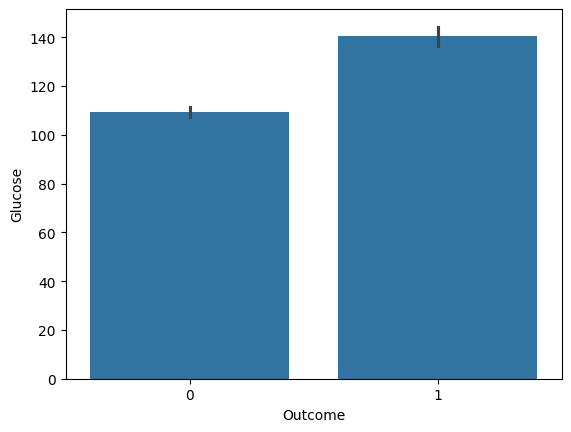

In [46]:
#Performing EDA and finding the relationship between the variables
sns.barplot(data=Diabetes,x='Outcome',y='Glucose')

<Axes: xlabel='Outcome', ylabel='BloodPressure'>

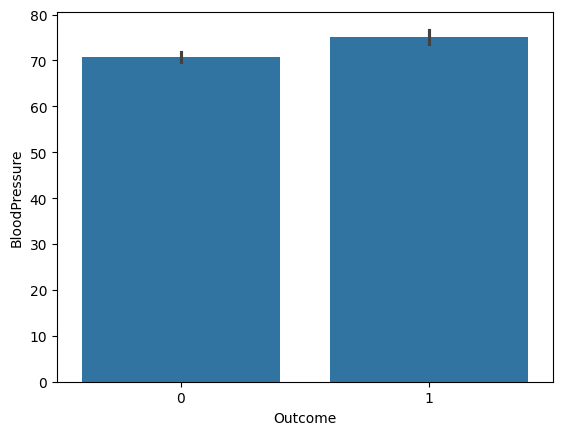

In [47]:
sns.barplot(data=Diabetes,x='Outcome',y='BloodPressure')

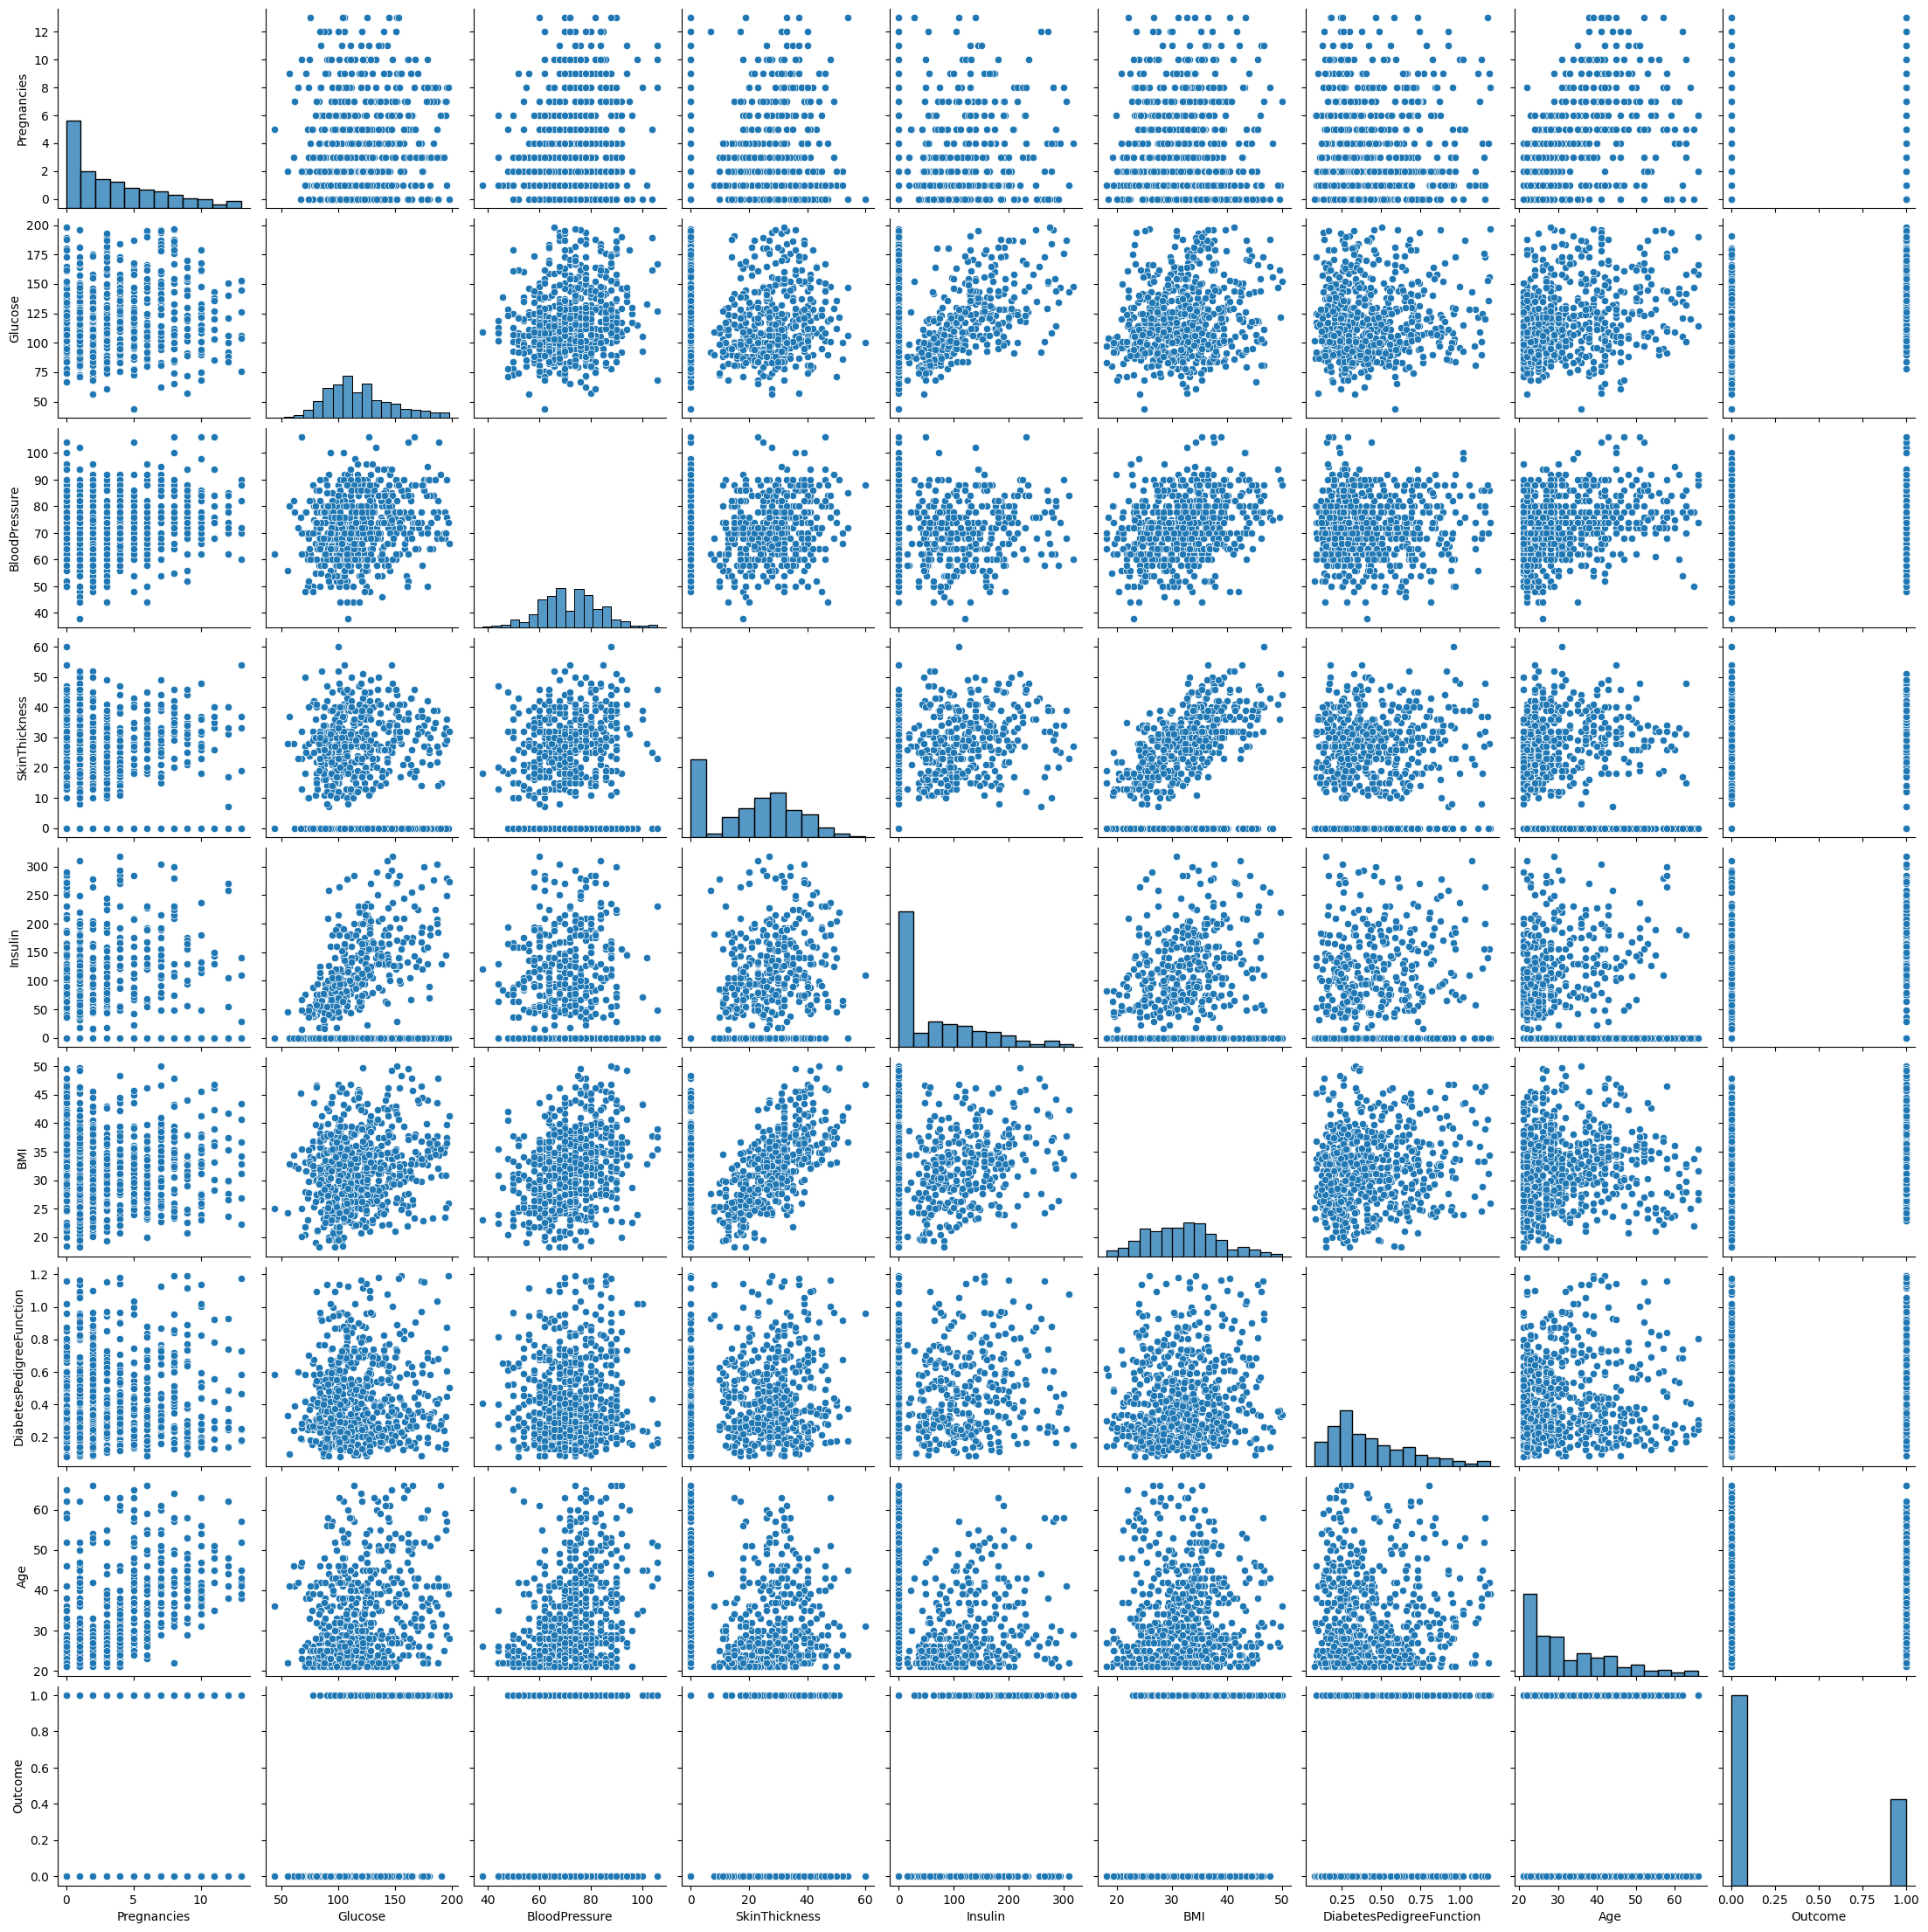

In [48]:
sns.pairplot(Diabetes)

<Axes: xlabel='Outcome', ylabel='Insulin'>

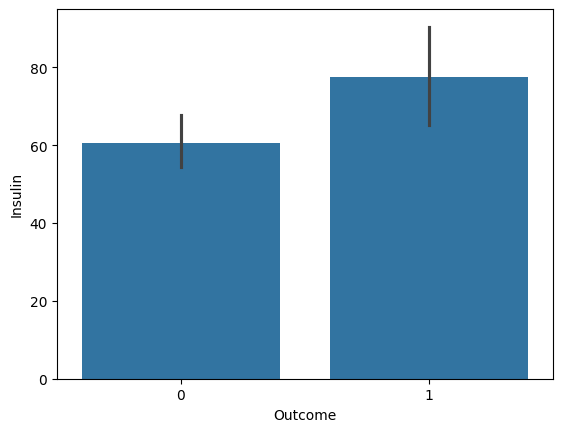

In [49]:
sns.barplot(x='Outcome',y='Insulin',data=Diabetes)

<Axes: xlabel='Outcome', ylabel='BMI'>

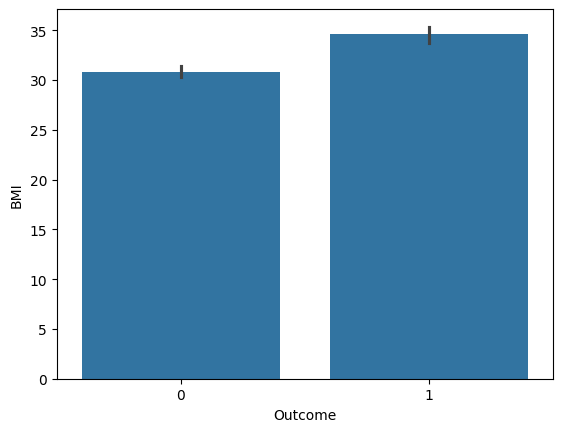

In [50]:
sns.barplot(x='Outcome', y='BMI', data=Diabetes)

<Axes: xlabel='Outcome', ylabel='Age'>

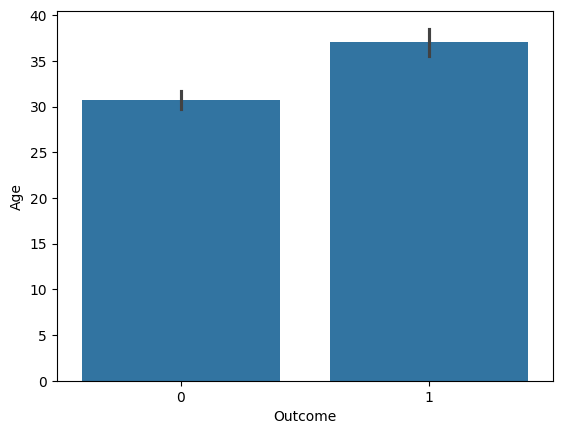

In [51]:
sns.barplot(x='Outcome', y='Age', data=Diabetes)

<Axes: xlabel='Glucose', ylabel='Count'>

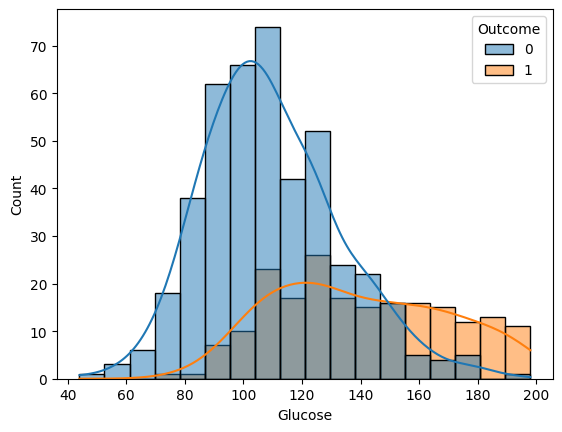

In [52]:
sns.histplot(x='Glucose', hue='Outcome', data=Diabetes, kde=True)

<Axes: xlabel='Insulin', ylabel='Count'>

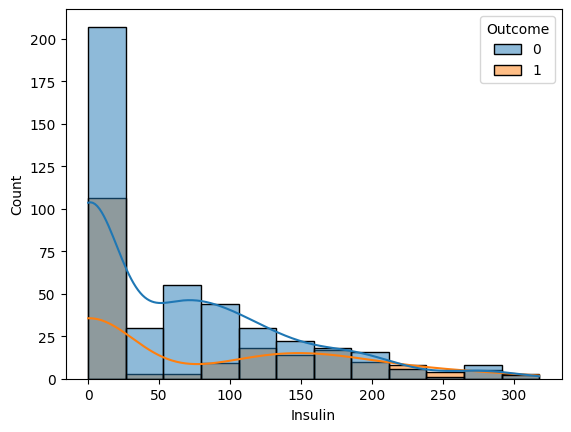

In [53]:
sns.histplot(x='Insulin', hue='Outcome', data=Diabetes, kde=True)

<Axes: xlabel='BMI', ylabel='Count'>

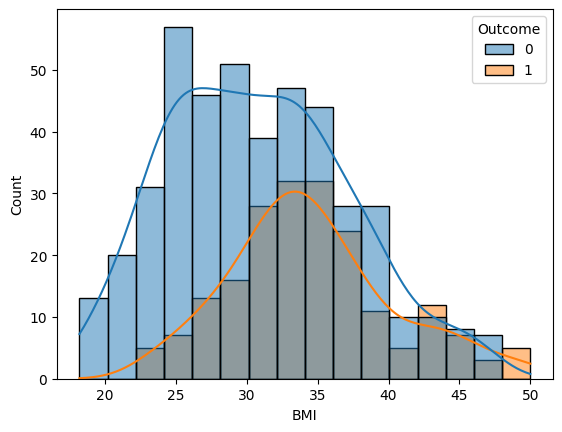

In [54]:
sns.histplot(x='BMI', hue='Outcome', data=Diabetes, kde=True)

<Axes: xlabel='Age', ylabel='Count'>

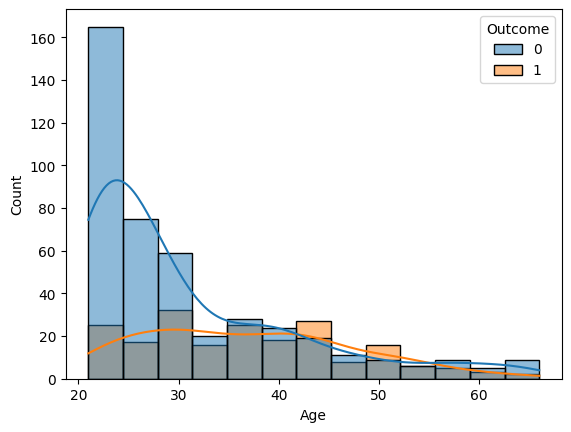

In [55]:
sns.histplot(x='Age',hue='Outcome',data=Diabetes,kde=True)

<Axes: xlabel='DiabetesPedigreeFunction', ylabel='Count'>

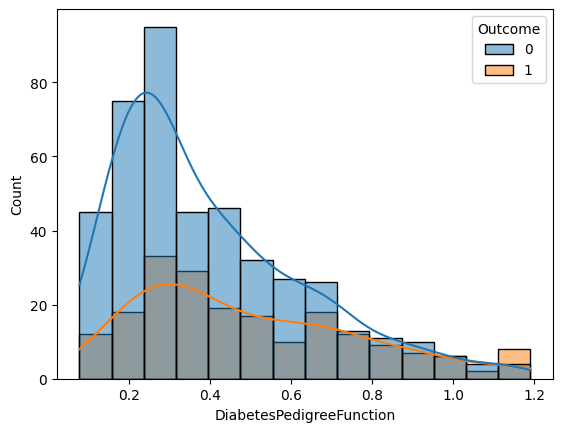

In [56]:
sns.histplot(x='DiabetesPedigreeFunction',hue='Outcome',data=Diabetes, kde=True)

<Axes: xlabel='Pregnancies', ylabel='Count'>

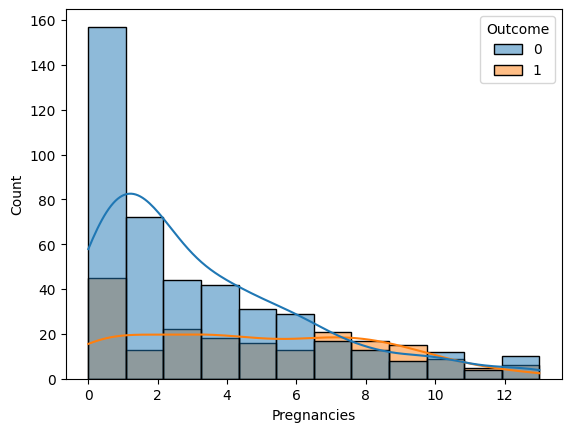

In [57]:
sns.histplot(x='Pregnancies',hue='Outcome',data=Diabetes, kde=True)

<Axes: >

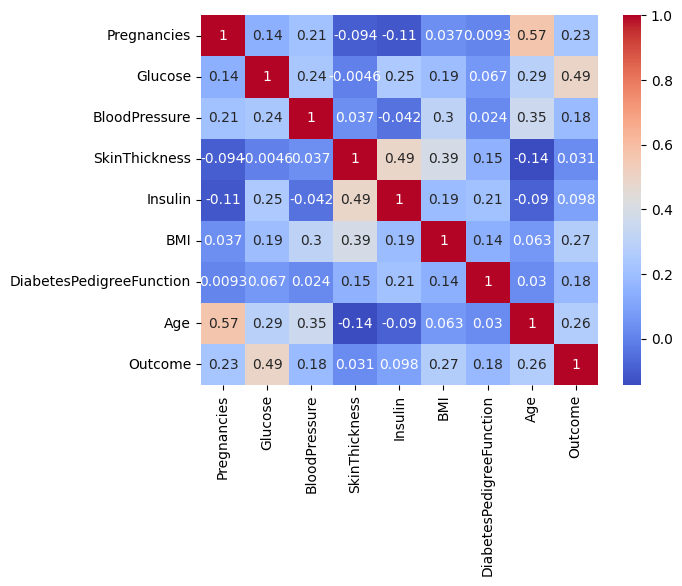

In [58]:
#Checking the correlation of all the variables in the dataset
correlation_diabetes=Diabetes.corr()
sns.heatmap(correlation_diabetes,annot=True,cmap='coolwarm')

In [59]:
#Checking the correaltion of the target variable with other features
target_correlation=Diabetes.corr()['Outcome'].drop('Outcome')
target_correlation

Pregnancies                 0.227987
Glucose                     0.492740
BloodPressure               0.183298
SkinThickness               0.030676
Insulin                     0.097746
BMI                         0.269371
DiabetesPedigreeFunction    0.179072
Age                         0.263344
Name: Outcome, dtype: float64

In [67]:
#Dividing the data into features X and the the target variable y
X=Diabetes[['Pregnancies','Glucose','BMI','DiabetesPedigreeFunction','Age','BloodPressure']]
y=Diabetes['Outcome']

In [68]:
X

,Pregnancies,Glucose,BMI,DiabetesPedigreeFunction,Age,BloodPressure
0,6,148,33.6,0.627,50,72
1,1,85,26.6,0.351,31,66
2,8,183,23.3,0.672,32,64
3,1,89,28.1,0.167,21,66
5,5,116,25.6,0.201,30,74
...,...,...,...,...,...,...
763,10,101,32.9,0.171,63,76
764,2,122,36.8,0.340,27,70
765,5,121,26.2,0.245,30,72
766,1,126,30.1,0.349,47,60


In [69]:
y

0      1
1      0
2      1
3      0
5      0
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 639, dtype: int64

In [73]:
#Splitting the data into training and testing data and training the model
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [74]:
#Making predictions on outcome variable
y_pred=model.predict(X_test)
print(f'The predictions of suffering from diabetes or not : {y_pred}')

The predictions of suffering from diabetes or not : [0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 1
 1 1 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


In [75]:
#Checking the accuracy and other performance metrics of the model
Accuracy=accuracy_score(y_test,y_pred)
F1=f1_score(y_test,y_pred)
Precision=precision_score(y_test,y_pred)
Recall=recall_score(y_test,y_pred)

print(f'Accuracy score of the model :{Accuracy}')
print(f'f1 score of the model :{F1}')
print(f'Precision score of the model :{Precision}')
print(f'Recall score of the model :{Recall}')

Accuracy score of the model :0.8125
f1 score of the model :0.6
Precision score of the model :0.75
Recall score of the model :0.5


In [76]:
y_pred1=model.predict(X_train)
Accuracy1=accuracy_score(y_train,y_pred1)
print(f'Accuracy score of the model :{Accuracy1}')

Accuracy score of the model :0.7886497064579256
